In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_style("white")

In [4]:
df = pd.read_csv('IMDB-Movie-Data.csv')

df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
print(df.columns)
print(df.shape)
print(df.dtypes)
df.describe()

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')
(1000, 12)
Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [6]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [7]:
df = df.dropna()

df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [8]:
df.rename(columns={'Runtime (Minutes)':'Runtime_Mins', 'Revenue (Millions)': 'Revenue_Mills'}, 
          inplace=True)

/Users/research/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


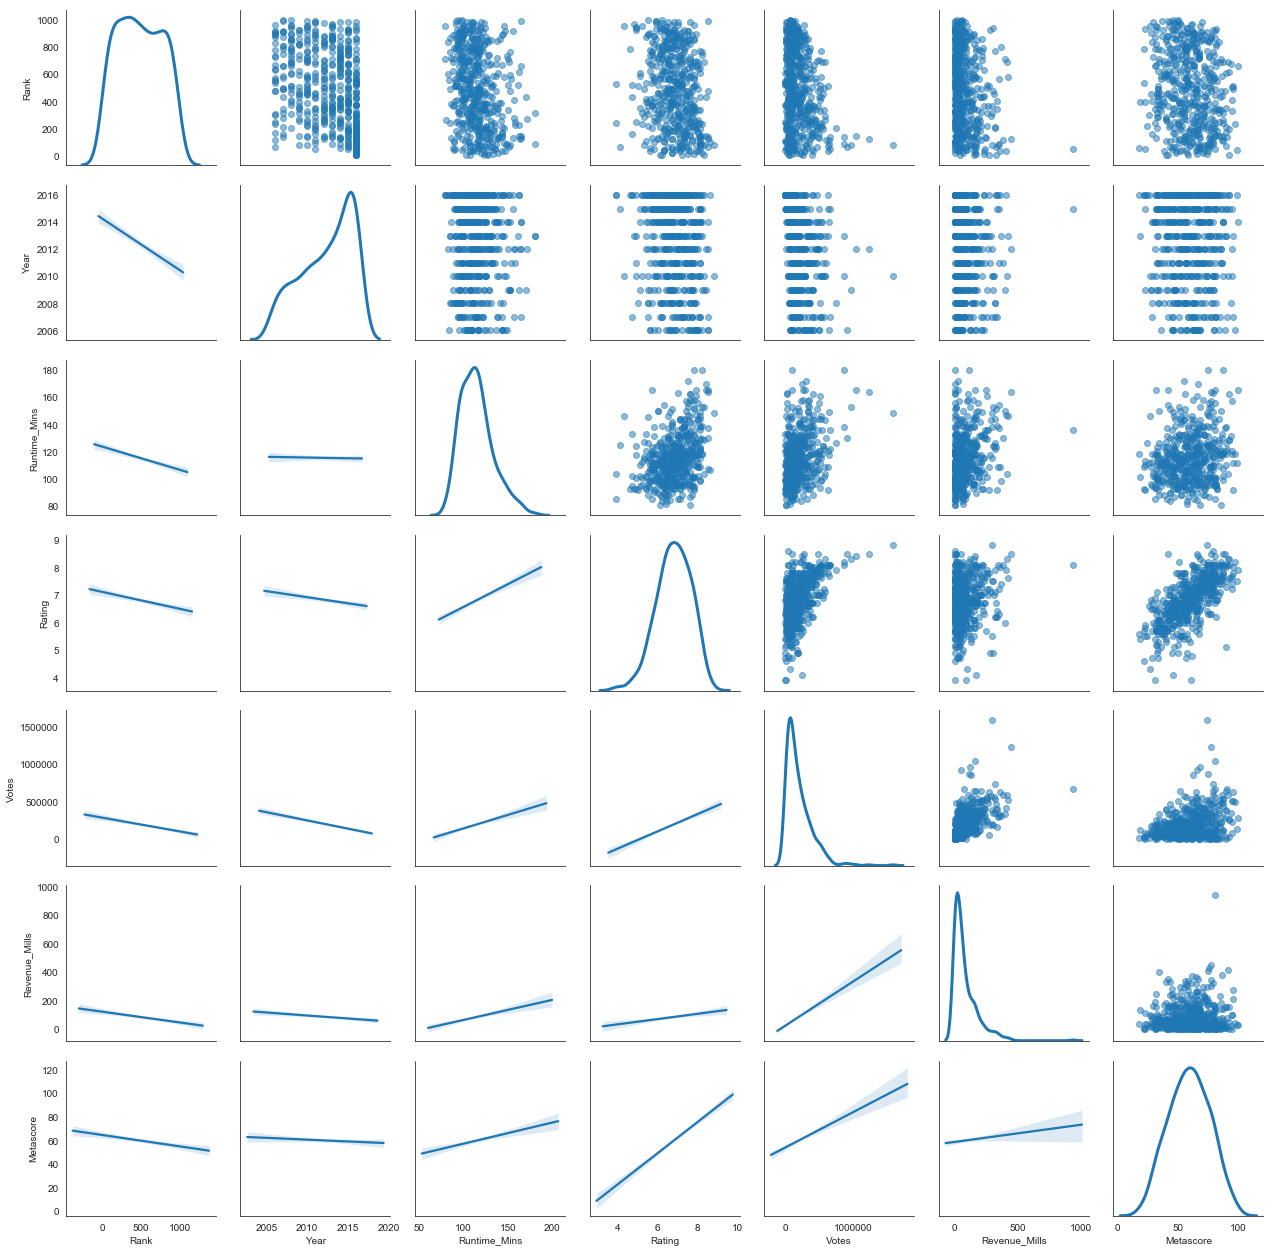

In [9]:
random_df = df.sample(n=500)


# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(random_df.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                   Rank      Year  Runtime_Mins    Rating     Votes  \
Rank           1.000000 -0.340195     -0.262513 -0.202558 -0.274707   
Year          -0.340195  1.000000     -0.018535 -0.161750 -0.366099   
Runtime_Mins  -0.262513 -0.018535      1.000000  0.356335  0.352563   
Rating        -0.202558 -0.161750      0.356335  1.000000  0.523145   
Votes         -0.274707 -0.366099      0.352563  0.523145  1.000000   
Revenue_Mills -0.220311 -0.136130      0.268728  0.163386  0.603406   
Metascore     -0.160929 -0.056487      0.195495  0.668677  0.333661   

               Revenue_Mills  Metascore  
Rank               -0.220311  -0.160929  
Year               -0.136130  -0.056487  
Runtime_Mins        0.268728   0.195495  
Rating              0.163386   0.668677  
Votes               0.603406   0.333661  
Revenue_Mills       1.000000   0.083596  
Metascore           0.083596   1.000000  


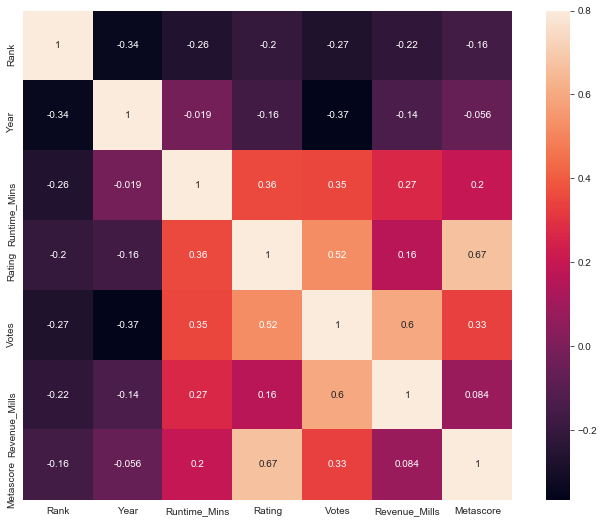

In [10]:
# Make the correlation matrix.
corrmat = random_df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)
plt.show()

In [11]:
# Create new columns for each genre

# new data frame with split value columns 
new = df["Genre"].str.split(",", n = 2, expand = True) 
  
# making seperate first genre column from new data frame 
df["First_Genre"]= new[0] 
  
# making seperate second genre column from new data frame 
df["Second_Genre"]= new[1] 

# making seperate third genre column from new data frame 
df["Third_Genre"]= new[2]
  
# Dropping old Genre column 
df.drop(columns =["Genre"], inplace = True) 
  
# dataframe display 
df 

,Rank,Title,Description,Director,Actors,Year,Runtime_Mins,Rating,Votes,Revenue_Mills,Metascore,First_Genre,Second_Genre,Third_Genre
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy
5,6,The Great Wall,European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Action,Adventure,Fantasy
6,7,La La Land,A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Comedy,Drama,Music
8,9,The Lost City of Z,"A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Action,Adventure,Biography
9,10,Passengers,A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Adventure,Drama,Romance
10,11,Fantastic Beasts and Where to Find Them,The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,Adventure,Family,Fantasy


In [12]:
df['Director'].value_counts(dropna=False)[:25]

Ridley Scott          8
Paul W.S. Anderson    6
Michael Bay           6
David Yates           6
Christopher Nolan     5
Martin Scorsese       5
Denis Villeneuve      5
Justin Lin            5
Peter Berg            5
Antoine Fuqua         5
David Fincher         5
Woody Allen           5
M. Night Shyamalan    5
Zack Snyder           5
Danny Boyle           5
J.J. Abrams           5
Guy Ritchie           4
Jon Favreau           4
Paul Feig             4
David O. Russell      4
Dennis Dugan          4
Adam McKay            4
Francis Lawrence      4
Guillermo del Toro    4
Nicholas Stoller      4
Name: Director, dtype: int64

In [13]:
df['Director'].nunique()

524

In [14]:
df['Title'].nunique()

837

In [15]:
# df['First_Genre'].nunique()
df['First_Genre'].value_counts(dropna=False)

Action       268
Comedy       151
Drama        148
Adventure     68
Biography     55
Crime         53
Animation     45
Horror        34
Mystery       11
Fantasy        2
Sci-Fi         2
Thriller       1
Name: First_Genre, dtype: int64

In [16]:
df['Second_Genre'].value_counts(dropna=False)

Drama        198
Adventure    168
NaN           66
Romance       59
Comedy        58
Crime         54
Thriller      41
Mystery       39
Horror        35
Fantasy       32
Family        26
Sci-Fi        21
Biography     10
Action         9
Music          8
History        7
Sport          3
War            2
Western        1
Musical        1
Name: Second_Genre, dtype: int64

In [17]:
df_genr = df.loc[
    ((df['First_Genre'] == 'Action') | (df['First_Genre'] == 'Comedy')),
    ['First_Genre', 'Runtime_Mins', 'Rating', 'Votes', 'Revenue_Mills', 'Metascore']
]

/Users/research/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


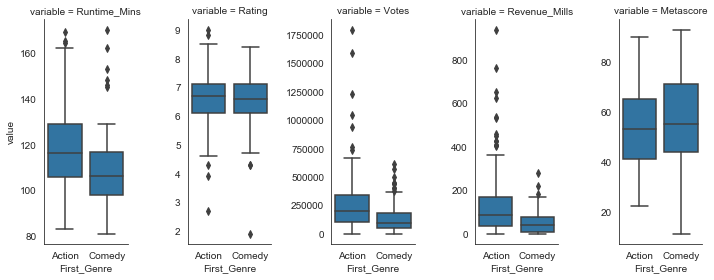

            Metascore                                                      \
                count       mean        std   min   25%   50%   75%   max   
First_Genre                                                                 
Action          268.0  53.533582  15.251536  22.0  41.0  53.0  65.0  90.0   
Comedy          151.0  56.364238  18.221410  11.0  44.0  55.0  71.0  93.0   

            Rating              ...     Runtime_Mins         Votes  \
             count      mean    ...              75%    max  count   
First_Genre                     ...                                  
Action       268.0  6.626866    ...            129.0  169.0  268.0   
Comedy       151.0  6.562252    ...            116.5  170.0  151.0   

                                                                      \
                      mean            std    min       25%       50%   
First_Genre                                                            
Action       250562.089552  224226.750638  552.

In [18]:
# Plot all the variables with boxplots for the top two genres

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_genr
df_long = pd.melt(df_long, id_vars=['First_Genre'])

g = sns.FacetGrid(df_long, col="variable", sharey=False, size=4, aspect=.5) #don't share y axis to show proper scale
g = g.map(sns.boxplot, "First_Genre", "value")
plt.show()

# Descriptive statistics by group.
print(df_genr.groupby('First_Genre').describe())

# Test whether group differences are significant.
for col in df_genr.loc[:,'Runtime_Mins':'Metascore'].columns:
    print(col)
    print(stats.ttest_ind(
        df_genr[df_genr['First_Genre'] == 'Action'][col].dropna(),
        df_genr[df_genr['First_Genre'] == 'Comedy'][col].dropna()
    ))

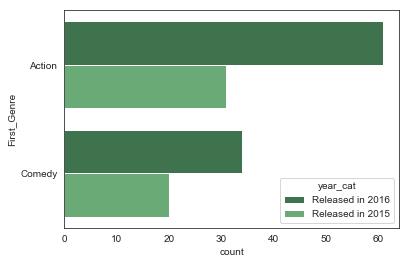

year_cat     Released in 2015  Released in 2016
First_Genre                                    
Action                     31                61
Comedy                     20                34
Power_divergenceResult(statistic=24.904109589041095, pvalue=1.616996712927718e-05)


In [19]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['First_Genre'] == 'Action') | (df['First_Genre'] == 'Comedy')) & (df['Year'] >= 2015),
    ['First_Genre','Year']
]

# Create a text variable so that output is easier to interpret.
df_2cat['Year_cat'] = None
df_2cat.loc[df_2cat['Year'] == 2015, 'year_cat'] = 'Released in 2015'
df_2cat.loc[df_2cat['Year'] == 2016, 'year_cat'] = 'Released in 2016'

# Plot counts for each combination of levels.
sns.countplot(y="First_Genre", hue="year_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['First_Genre'], df_2cat['year_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

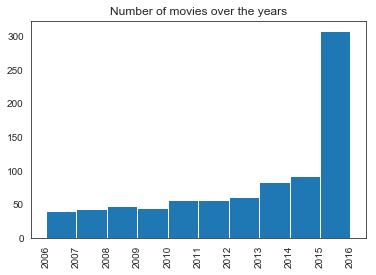

In [20]:
plt.title("Number of movies over the years")
plt.xticks(range(2005,2019),rotation=90)
plt.hist(df.Year)
plt.show()

In [21]:
# data.groupby(['col1', 'col2'])['col3'].mean()
df.describe()

,Rank,Year,Runtime_Mins,Rating,Votes,Revenue_Mills,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C , where:

* R = average for the movie (mean) = (Rating)
* v = number of votes for the movie = (votes)
* m = minimum votes required to be listed in the Top 250 (currently 25,000)
* C = the mean vote across the whole report (currently 6.8)

source: https://help.imdb.com/article/imdb/track-movies-tv/faq-for-imdb-ratings/G67Y87TFYYP6TWAV#

rated meta = ((rating * 10) + metascore) / 2

In [22]:
# Calculate the average between rating and metascore
r = df['Rating']
m = df['Metascore']
rating_meta = ((r * 10) + m) / 2 

df['Rated_Meta'] = rating_meta

df.head()

,Rank,Title,Description,Director,Actors,Year,Runtime_Mins,Rating,Votes,Revenue_Mills,Metascore,First_Genre,Second_Genre,Third_Genre,Rated_Meta
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,78.5
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,67.5
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,67.5
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,65.5
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,51.0


Text(0.5,1,'Box Plot')

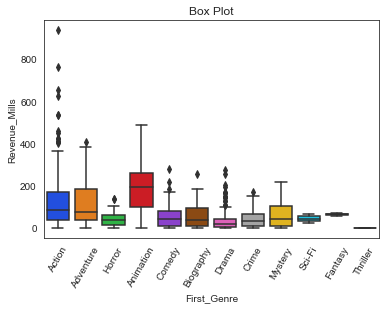

In [23]:
# first genre and revenue 
# ax = sns.boxplot(x="day", y="total_bill", data=tips)
#Box Plot
ax = sns.boxplot(x=df['First_Genre'], 
               y=df['Revenue_Mills'],
               data=df,
               palette='bright')
# sns.despine(trim=True, left=True, bottom=True)

g.set(xlabel='Genre', ylabel='Revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

plt.title('Box Plot')

In [24]:
# df_condensed = df[['Rank', 'Title', 'Director', 'Year', 'Runtime_Mins', 'Votes', 'Revenue_Mills', 'First_Genre', 'Rated_Meta']]

In [25]:
# create a popularity feature (more votes & higher ratings = more money)
# df['Popularity'] = np.where((df['Votes'] > df['Votes'].mean()) & 
#                             (df['Rated_Meta'] > df['Rated_Meta'].mean()), 
#                             "High", "Low")
avg_votes = df['Votes'].mean()
avg_rating = df['Rated_Meta'].mean()

df['Popularity'] = np.where((df['Votes'] > avg_votes) & 
                            (df['Rated_Meta'] > avg_rating), 
                             "High", "Low")

df.head()

,Rank,Title,Description,Director,Actors,Year,Runtime_Mins,Rating,Votes,Revenue_Mills,Metascore,First_Genre,Second_Genre,Third_Genre,Rated_Meta,Popularity
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,78.5,High
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,67.5,High
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,67.5,Low
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,65.5,Low
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,51.0,Low


/Users/research/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'Action'),
 Text(1,0,'Adventure'),
 Text(2,0,'Horror'),
 Text(3,0,'Animation'),
 Text(4,0,'Comedy'),
 Text(5,0,'Biography'),
 Text(6,0,'Drama'),
 Text(7,0,'Crime'),
 Text(8,0,'Mystery'),
 Text(9,0,'Sci-Fi'),
 Text(10,0,'Fantasy'),
 Text(11,0,'Thriller')]

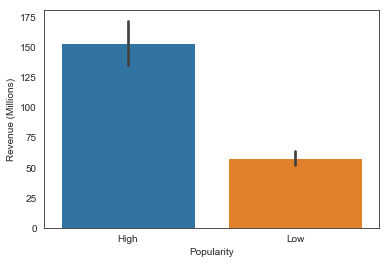

In [26]:
#JointPlot
#      palette='bright')

g = sns.barplot("Popularity", "Revenue_Mills", data=df)

g.set(ylabel='Revenue (Millions)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

action + adventure <br>
horror + thriller <br>
animation <br>
comedy <br>
biog + drama <br>
crime + mystery <br>
sci fi + fantasy <br>

#after condensing the genres, create get dummies# <br>
features = pd.get_dummies(df['cntry'])
#Nordic countries dummy.
features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

In [27]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['First_Genre'])

# Genres dummy.
features['Fantasy_Adventure'] = np.where((df['First_Genre'].isin(['Adventure', 'Fantasy'])), 1, 0)
features['Horror_SciFi'] = np.where((df['First_Genre'].isin(['Thriller', 'Horror', 'Mystery', 'Sci-Fi'])), 1, 0)
features['Drama_Bio'] = np.where((df['First_Genre'].isin(['Drama', 'Biography', 'Crime'])), 1, 0)
features['Action'] = np.where((df['First_Genre'].isin(['Action'])), 1, 0)
features['Animation'] = np.where((df['First_Genre'].isin(['Animation'])), 1, 0)
features['Comedy'] = np.where((df['First_Genre'].isin(['Comedy'])), 1, 0)

In [28]:
# features.head()
pd.crosstab([features.Fantasy_Adventure, features.Horror_SciFi, features.Drama_Bio], df.First_Genre,  margins=True)

First_Genre                               Action  Adventure  Animation  \
Fantasy_Adventure Horror_SciFi Drama_Bio                                 
0                 0            0             268          0         45   
                               1               0          0          0   
                  1            0               0          0          0   
1                 0            0               0         68          0   
All                                          268         68         45   

First_Genre                               Biography  Comedy  Crime  Drama  \
Fantasy_Adventure Horror_SciFi Drama_Bio                                    
0                 0            0                  0     151      0      0   
                               1                 55       0     53    148   
                  1            0                  0       0      0      0   
1                 0            0                  0       0      0      0   
All                                              55     151     53    148   

First_Genre                               Fantasy  Horror  Mystery  Sci-Fi  \
Fantasy_Adventure Horror_SciFi Drama_Bio                                     
0                 0            0                0       0        0       0   
                               1                0       0        0       0   
                  1            0                0      34       11       2   
1                 0            0                2       0        0       0   
All                                             2      34       11       2   

First_Genre                               Thriller  All  
Fantasy_Adventure Horror_SciFi Drama_Bio                 
0                 0            0                 0  464  
                               1                 0  256  
                  1            0                 1   48  
1                 0            0                 0   70  
All                                              1  838

In [29]:
# Create new columns for first actor

# new data frame with split value columns 
new = df["Actors"].str.split(",", n = 1, expand = True) 
  
# making seperate first genre column from new data frame 
df["First_Actor"]= new[0] 
  
# making seperate second genre column from new data frame 
df["Support_Actors"]= new[1] 
  
# Dropping old Actor column 
df.drop(columns =["Actors"], inplace = True) 
  
# dataframe display 
df 

,Rank,Title,Description,Director,Year,Runtime_Mins,Rating,Votes,Revenue_Mills,Metascore,First_Genre,Second_Genre,Third_Genre,Rated_Meta,Popularity,First_Actor,Support_Actors
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,78.5,High,Chris Pratt,"Vin Diesel, Bradley Cooper, Zoe Saldana"
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,67.5,High,Noomi Rapace,"Logan Marshall-Green, Michael Fassbender, Cha..."
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,67.5,Low,James McAvoy,"Anya Taylor-Joy, Haley Lu Richardson, Jessica..."
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,65.5,Low,Matthew McConaughey,"Reese Witherspoon, Seth MacFarlane, Scarlett J..."
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,51.0,Low,Will Smith,"Jared Leto, Margot Robbie, Viola Davis"
5,6,The Great Wall,European mercenaries searching for black powde...,Yimou Zhang,2016,103,6.1,56036,45.13,42.0,Action,Adventure,Fantasy,51.5,Low,Matt Damon,"Tian Jing, Willem Dafoe, Andy Lau"
6,7,La La Land,A jazz pianist falls for an aspiring actress i...,Damien Chazelle,2016,128,8.3,258682,151.06,93.0,Comedy,Drama,Music,88.0,High,Ryan Gosling,"Emma Stone, Rosemarie DeWitt, J.K. Simmons"
8,9,The Lost City of Z,"A true-life drama, centering on British explor...",James Gray,2016,141,7.1,7188,8.01,78.0,Action,Adventure,Biography,74.5,Low,Charlie Hunnam,"Robert Pattinson, Sienna Miller, Tom Holland"
9,10,Passengers,A spacecraft traveling to a distant colony pla...,Morten Tyldum,2016,116,7.0,192177,100.01,41.0,Adventure,Drama,Romance,55.5,Low,Jennifer Lawrence,"Chris Pratt, Michael Sheen,Laurence Fishburne"
10,11,Fantastic Beasts and Where to Find Them,The adventures of writer Newt Scamander in New...,David Yates,2016,133,7.5,232072,234.02,66.0,Adventure,Family,Fantasy,70.5,High,Eddie Redmayne,"Katherine Waterston, Alison Sudol,Dan Fogler"


In [30]:
df['First_Actor'].nunique()

431

In [31]:
# Top 25 actors by movie appearances
df['First_Actor'].value_counts(dropna=False)[:25]

Mark Wahlberg          11
Christian Bale         11
Leonardo DiCaprio       9
Brad Pitt               9
Jake Gyllenhaal         9
Tom Hanks               8
Adam Sandler            8
Denzel Washington       8
Will Smith              8
Robert Downey Jr.       8
Tom Hardy               7
Tom Cruise              7
Daniel Radcliffe        7
Johnny Depp             7
Jesse Eisenberg         6
Vin Diesel              6
Chris Hemsworth         6
Will Ferrell            6
Hugh Jackman            6
Seth Rogen              6
Michael Fassbender      6
Matthew McConaughey     6
Sylvester Stallone      6
Chris Pine              6
Ben Affleck             6
Name: First_Actor, dtype: int64

/Users/research/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


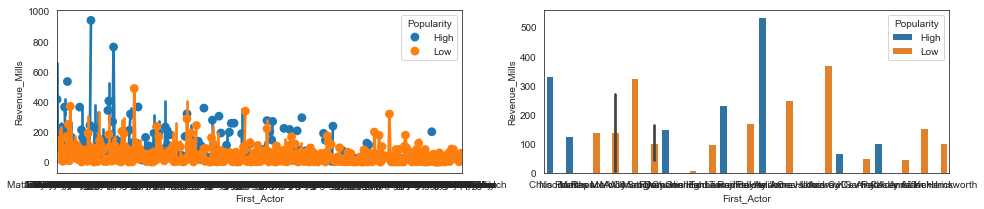

In [32]:
fig = plt.figure(figsize=(16,12))
fig.subplots_adjust(hspace=.5)

# Actor revenue
g = fig.add_subplot(3,2,1)
ax = sns.pointplot(x='First_Actor', y='Revenue_Mills', hue='Popularity',
                    data=df)


# top 25 actor with most appearances revenue
top_25_actors = df.loc[:25, 'First_Actor']

g = fig.add_subplot(3,2,2)
ax = sns.barplot(x=top_25_actors, y='Revenue_Mills', hue='Popularity',
                    data=df)

In [33]:
df_selected = df

df_selected.head()

,Rank,Title,Description,Director,Year,Runtime_Mins,Rating,Votes,Revenue_Mills,Metascore,First_Genre,Second_Genre,Third_Genre,Rated_Meta,Popularity,First_Actor,Support_Actors
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,78.5,High,Chris Pratt,"Vin Diesel, Bradley Cooper, Zoe Saldana"
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,67.5,High,Noomi Rapace,"Logan Marshall-Green, Michael Fassbender, Cha..."
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,67.5,Low,James McAvoy,"Anya Taylor-Joy, Haley Lu Richardson, Jessica..."
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,65.5,Low,Matthew McConaughey,"Reese Witherspoon, Seth MacFarlane, Scarlett J..."
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,51.0,Low,Will Smith,"Jared Leto, Margot Robbie, Viola Davis"


In [34]:
features2 = pd.get_dummies(df_selected['Popularity'])

features2.head()

,High,Low
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [35]:
# Add the one-hot popularity columns
df_selected = pd.concat([df_selected, features2], axis=1)

# Dropping old Popularity column 
df_selected.drop(columns =["Popularity"], inplace = True)

df_selected.head()

,Rank,Title,Description,Director,Year,Runtime_Mins,Rating,Votes,Revenue_Mills,Metascore,First_Genre,Second_Genre,Third_Genre,Rated_Meta,First_Actor,Support_Actors,High,Low
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,78.5,Chris Pratt,"Vin Diesel, Bradley Cooper, Zoe Saldana",1,0
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,67.5,Noomi Rapace,"Logan Marshall-Green, Michael Fassbender, Cha...",1,0
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,67.5,James McAvoy,"Anya Taylor-Joy, Haley Lu Richardson, Jessica...",0,1
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,65.5,Matthew McConaughey,"Reese Witherspoon, Seth MacFarlane, Scarlett J...",0,1
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,51.0,Will Smith,"Jared Leto, Margot Robbie, Viola Davis",0,1


In [36]:
features.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Sci-Fi,Thriller,Fantasy_Adventure,Horror_SciFi,Drama_Bio
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# Drop old categories (put into groups)
features.drop(columns =['Adventure', 'Biography', 'Fantasy', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'Drama', 'Crime'], inplace = True)

features.head()

,Action,Animation,Comedy,Fantasy_Adventure,Horror_SciFi,Drama_Bio
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [38]:
# Add the genre dummies to the selected df
df_selected = pd.concat([df_selected, features], axis=1)

df_selected.head()

,Rank,Title,Description,Director,Year,Runtime_Mins,Rating,Votes,Revenue_Mills,Metascore,...,First_Actor,Support_Actors,High,Low,Action,Animation,Comedy,Fantasy_Adventure,Horror_SciFi,Drama_Bio
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,2014,121,8.1,757074,333.13,76.0,...,Chris Pratt,"Vin Diesel, Bradley Cooper, Zoe Saldana",1,0,1,0,0,0,0,0
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,2012,124,7.0,485820,126.46,65.0,...,Noomi Rapace,"Logan Marshall-Green, Michael Fassbender, Cha...",1,0,0,0,0,1,0,0
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,...,James McAvoy,"Anya Taylor-Joy, Haley Lu Richardson, Jessica...",0,1,0,0,0,0,1,0
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,...,Matthew McConaughey,"Reese Witherspoon, Seth MacFarlane, Scarlett J...",0,1,0,1,0,0,0,0
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,2016,123,6.2,393727,325.02,40.0,...,Will Smith,"Jared Leto, Margot Robbie, Viola Davis",0,1,1,0,0,0,0,0


                   Rank      Year  Runtime_Mins    Rating     Votes  \
Rank           1.000000 -0.340195     -0.262513 -0.202558 -0.274707   
Year          -0.340195  1.000000     -0.018535 -0.161750 -0.366099   
Runtime_Mins  -0.262513 -0.018535      1.000000  0.356335  0.352563   
Rating        -0.202558 -0.161750      0.356335  1.000000  0.523145   
Votes         -0.274707 -0.366099      0.352563  0.523145  1.000000   
Revenue_Mills -0.220311 -0.136130      0.268728  0.163386  0.603406   
Metascore     -0.160929 -0.056487      0.195495  0.668677  0.333661   

               Revenue_Mills  Metascore  
Rank               -0.220311  -0.160929  
Year               -0.136130  -0.056487  
Runtime_Mins        0.268728   0.195495  
Rating              0.163386   0.668677  
Votes               0.603406   0.333661  
Revenue_Mills       1.000000   0.083596  
Metascore           0.083596   1.000000  


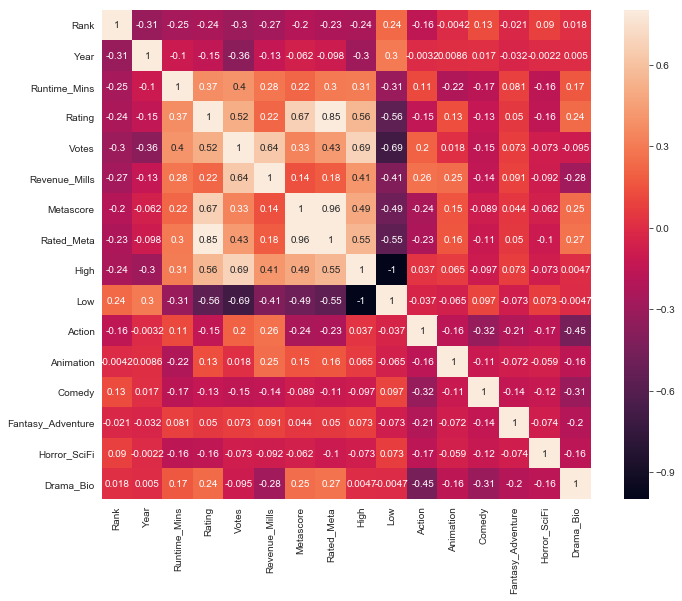

In [39]:
# Make the correlation matrix.
corrmat2 = df_selected.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, annot=True, vmax=.8, square=True)
plt.show()

In [40]:
#PCA stat quest style 
feats = df_selected[['Revenue_Mills', 'Rank', 'Year', 'Runtime_Mins', 'Votes', 'Rated_Meta', 'High', 'Low', 'Action', 'Animation', 'Comedy', 'Fantasy_Adventure', 'Horror_SciFi', 'Drama_Bio']]

In [45]:
feats.head()

,Revenue_Mills,Rank,Year,Runtime_Mins,Votes,Rated_Meta,High,Low,Action,Animation,Comedy,Fantasy_Adventure,Horror_SciFi,Drama_Bio
0,333.13,1,2014,121,757074,78.5,1,0,1,0,0,0,0,0
1,126.46,2,2012,124,485820,67.5,1,0,0,0,0,1,0,0
2,138.12,3,2016,117,157606,67.5,0,1,0,0,0,0,1,0
3,270.32,4,2016,108,60545,65.5,0,1,0,1,0,0,0,0
4,325.02,5,2016,123,393727,51.0,0,1,1,0,0,0,0,0


                   Revenue_Mills      Rank      Year  Runtime_Mins     Votes  \
Revenue_Mills           1.000000 -0.273170 -0.129198      0.281721  0.636833   
Rank                   -0.273170  1.000000 -0.312809     -0.254783 -0.303284   
Year                   -0.129198 -0.312809  1.000000     -0.101933 -0.362445   
Runtime_Mins            0.281721 -0.254783 -0.101933      1.000000  0.399298   
Votes                   0.636833 -0.303284 -0.362445      0.399298  1.000000   
Rated_Meta              0.181787 -0.229575 -0.098270      0.296312  0.428481   
High                    0.411421 -0.236804 -0.295850      0.305338  0.685831   
Low                    -0.411421  0.236804  0.295850     -0.305338 -0.685831   
Action                  0.263075 -0.155998 -0.003163      0.111006  0.203707   
Animation               0.245826 -0.004216  0.008645     -0.218725  0.018231   
Comedy                 -0.142692  0.130942  0.017058     -0.173978 -0.152634   
Fantasy_Adventure       0.091030 -0.0208

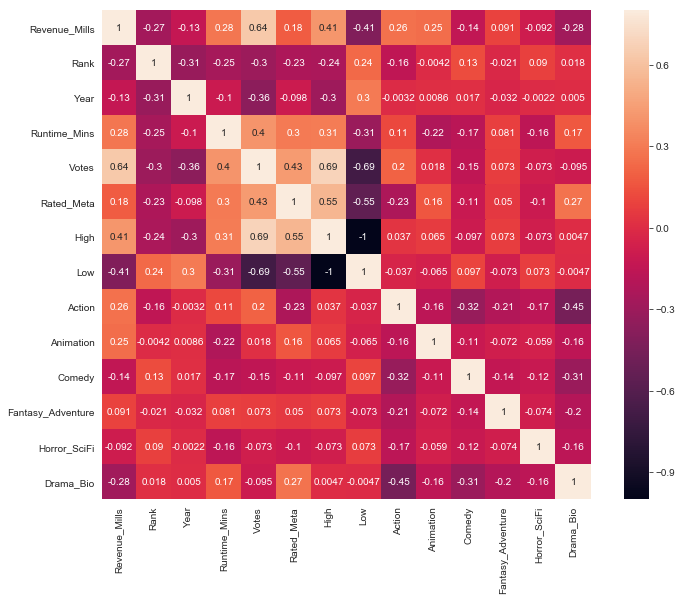

In [41]:
# Make the correlation matrix.
corrmat2 = feats.corr()
print(corrmat2)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, annot=True, vmax=.8, square=True)
plt.show()

In [42]:
# First center and scale the data
scaled_data = StandardScaler().fit_transform(feats)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

In [47]:
var_feat = ['Rank', 'Year', 'Runtime_Mins', 'Votes', 'Rated_Meta', 'High', 'Low', 'Action', 'Animation', 'Comedy', 'Fantasy_Adventure', 'Horror_SciFi', 'Drama_Bio']
target = ['Revenue_Mills']
# Separating out the features
x = feats.loc[:, var_feat].values
# Separating out the target
y = feats.loc[:,target].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [48]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [49]:
finalDf = pd.concat([principalDf, feats[['Revenue_Mills']]], axis = 1)

In [50]:
pca.explained_variance_ratio_

array([0.26785565, 0.12665002, 0.11539876, 0.09727933, 0.08905739])

In [51]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Revenue_Mills
0,3.777169,1.869491,-0.553076,0.914599,0.027101,333.13
1,3.095687,0.374210,0.178157,0.799766,-1.401696,126.46
2,-0.783130,0.162496,-0.546333,1.238480,1.372595,138.12
3,-0.721183,-0.311083,-0.257246,3.990541,1.451398,270.32
4,-0.185007,2.376825,-1.648926,0.593416,-0.096079,325.02


In [54]:
## get the names of the top 5 measurements (IMDB features) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=var_feat)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 5 features
top_5_features = sorted_loading_scores[:5].index.values #the first feature is low_pop which is the same as high
 
## print the feature names and their scores (and +/- sign)
print(loading_scores[top_5_features])

Low            -0.489085
High            0.489085
Votes           0.445485
Rated_Meta      0.367886
Runtime_Mins    0.283796
dtype: float64
